In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [2]:
A = 0.003472442866550257
A_err = 2.6927087730399573*1e-05

In [3]:
A_H = 320.0 *1e-3
A_H_err = 0.5 *1e-3

A_B = A*A_H
A_B_err = A_err*A_H + A*A_H_err

print(f'A_B = {A_B} +- {A_B_err}')

A_B = 0.0011111817172960823 +- 1.0352889507002992e-05


In [4]:
A_V = 1.710
A_V_err = 0.005

R = 10.0
R_err = 0.1

A_I = A_V/R
A_I_err = A_V_err/R + A_V/(R**2) * R_err

print(f'A_I = {A_I} +- {A_I_err}')

A_I = 0.17099999999999999 +- 0.00221


In [5]:
mu = 4*np.pi *1e-7

N = 760

L = 14.80 *1e-2
L_err = 0.05*1e-2

R = (3.9 + 6.9)/4 * 1e-2
R_err = 0.03 * 1e-2 

n = N/L
n_err = N/(L**2) * L_err

eta = R/L
eta_err = R_err/L + R/L**2 *L_err

a = mu*n/2 * (1/np.sqrt(1/4 + eta**2))
a_err = mu/2 * (1/np.sqrt(1/4 + eta**2)) * n_err + mu*n/4 * (1/4 + eta**2)**(-3/2) * 2*eta *eta_err

A_B_t = a*A_I
A_B_t_err = a_err*A_I + a*A_I_err

print(f'A_B = {A_B_t} +- {A_B_t_err}')

A_B = 0.0010366178386124801 +- 1.8663957619648815e-05


Text(0.5, 1.0, 'Campo Magnético em função do tempo')

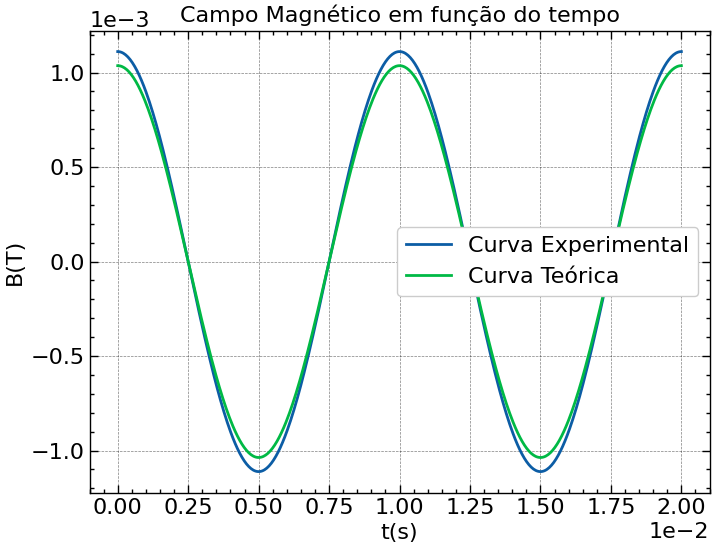

In [6]:
tau = 10*1e-3

t = np.linspace(0,2*tau, 500)

MHS = lambda t, A: A*np.cos(2*np.pi/tau * t)

plt.plot(t,MHS(t,A_B), label = 'Curva Experimental')
plt.plot(t,MHS(t,A_B_t), label = 'Curva Teórica')

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.legend()

plt.xlabel('t(s)')
plt.ylabel('B(T)')

plt.title('Campo Magnético em função do tempo')